In [1]:
cd drive/My Drive

/content/drive/My Drive


In [2]:
cd Topic-modeling/

/content/drive/My Drive/Topic-modeling


In [3]:
#!unzip test_8iecVfC.zip

In [4]:
#!unzip train_tGmol3O.zip

In [5]:
#! wget http://nlp.stanford.edu/data/glove.6B.zip

In [6]:
#!unzip glove.6B.zip

In [7]:
%ls

CNN_text.ipynb                 submit1.csv  test_8iecVfC.zip
glove.6B.100d.txt              submit2.csv  test.csv
glove.6B.200d.txt              submit3.csv  train.csv
glove.6B.300d.txt              submit4.csv  train_tGmol3O.zip
glove.6B.50d.txt               submit5.csv  Untitled0.ipynb
sample_submission_UVKGLZE.csv  submit.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [11]:
from nltk.stem import PorterStemmer 


In [12]:
def stemmer(sents):

  potr = PorterStemmer()
  stemmed = [potr.stem(word) for word in word_tokenize(sents)]
  #print(lemmatized)
  stemmed = ' '.join(stemmed)
  return stemmed

In [13]:
def lemma(sents):

  lmtzr = WordNetLemmatizer()
  lemmatized = [lmtzr.lemmatize(word) for word in word_tokenize(sents)]
  #print(lemmatized)
  lemmatize = ' '.join(lemmatized)
  return lemmatize

In [14]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [15]:
train_data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [16]:
print(train_data['TITLE'][0])
print('abstract')
print(train_data['ABSTRACT'][0])

Reconstructing Subject-Specific Effect Maps
abstract
  Predictive models allow subject-specific inference when analyzing disease
related alterations in neuroimaging data. Given a subject's data, inference can
be made at two levels: global, i.e. identifiying condition presence for the
subject, and local, i.e. detecting condition effect on each individual
measurement extracted from the subject's data. While global inference is widely
used, local inference, which can be used to form subject-specific effect maps,
is rarely used because existing models often yield noisy detections composed of
dispersed isolated islands. In this article, we propose a reconstruction
method, named RSM, to improve subject-specific detections of predictive
modeling approaches and in particular, binary classifiers. RSM specifically
aims to reduce noise due to sampling error associated with using a finite
sample of examples to train classifiers. The proposed method is a wrapper-type
algorithm that can be used with

In [17]:
combined_abstract=pd.concat([train_data,test_data])['ABSTRACT'].reset_index(drop=True)

In [18]:
total_data=pd.concat([train_data,test_data])[['ID','TITLE','ABSTRACT']]

In [19]:
combined_abstract

0          Predictive models allow subject-specific inf...
1          Rotation invariance and translation invarian...
2          We introduce and develop the notion of spher...
3          The stochastic Landau--Lifshitz--Gilbert (LL...
4          Fourier-transform infra-red (FTIR) spectra o...
                               ...                        
29956      We approach the problem of implementing mixe...
29957      In the theory of Markov decision processes (...
29958      GeneVis is a web-based tool to visualize com...
29959      This paper quantifies the effect of speed ca...
29960      We show that the vertices and edges of a $d$...
Name: ABSTRACT, Length: 29961, dtype: object

In [20]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    #re.sub('[^A-Za-z0-9]+', '', mystring)
    #text = re.sub(pattern, '', x)
    text=re.sub('\W+',' ', x)
    #text1=re.sub('\n',' ',text)
    text2=re.sub(r'(?:^| )\w(?:$| )', ' ', text)
    text2=re.sub(r'(?:^| )\w(?:$| )', ' ', text2)
    #text3=re.sub('\W+',' ', text2)
    #text3=re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text2)
    return text2.lower()

In [21]:
stop_words = set(stopwords.words("english"))

In [22]:
def filter_stop_words(x):
    #for i, sentence in enumerate(train_sentences):
    #print(i)
    new_sent = [word for word in x.split() if word not in stop_words]
        #print(new_sent)
    train_sentences = ' '.join(new_sent)
    return train_sentences

In [23]:
processed_text=combined_abstract.apply(clean_text)

In [24]:
processed_text=processed_text.apply(filter_stop_words)
processed_text=processed_text.apply(lemma)

In [25]:
processed_text

0        predictive model allow subject specific infere...
1        rotation invariance translation invariance gre...
2        introduce develop notion spherical polyharmoni...
3        stochastic landau lifshitz gilbert llg equatio...
4        fourier transform infra red ftir spectrum samp...
                               ...                        
29956    approach problem implementing mixed datatype s...
29957    theory markov decision process mdps blackwell ...
29958    genevis web based tool visualize complementary...
29959    paper quantifies effect speed camera road traf...
29960    show vertex edge dimensional grid graph geqsla...
Name: ABSTRACT, Length: 29961, dtype: object

In [26]:
## tokenize
processed_text[0]

'predictive model allow subject specific inference analyzing disease related alteration neuroimaging data given subject data inference made two level global identifiying condition presence subject local detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect map rarely used existing model often yield noisy detection composed dispersed isolated island article propose reconstruction method named rsm improve subject specific detection predictive modeling approach particular binary classifier rsm specifically aim reduce noise due sampling error associated using finite sample example train classifier proposed method wrapper type algorithm used different binary classifier diagnostic manner without information condition presence reconstruction posed maximum posteriori problem prior model whose parameter estimated training data classifier specific fashion experimental evaluation performed synthetica

In [27]:
from keras.preprocessing.text import Tokenizer

In [28]:
def no_of_words(processed_text):

  return len(re.findall(r'\w+',processed_text))
processed_text.apply(no_of_words).max()

257

In [29]:
y=train_data.drop(columns=['ID','TITLE','ABSTRACT'])
y_train=y.iloc[:15000,:]
y_valid=y.iloc[15000:,:]

In [30]:
Train_data=train_data.iloc[:15000,2]
valid_data=train_data.iloc[15000:,2]

In [31]:
Train_data

0          Predictive models allow subject-specific inf...
1          Rotation invariance and translation invarian...
2          We introduce and develop the notion of spher...
3          The stochastic Landau--Lifshitz--Gilbert (LL...
4          Fourier-transform infra-red (FTIR) spectra o...
                               ...                        
14995      The challenge of understanding high-temperat...
14996      In this work, we apply the Cole's non-standa...
14997      Magnetic oxyselenides have been the topic of...
14998      This paper presents a novel framework for in...
14999      To design a uniaxial anisotropic metamateria...
Name: ABSTRACT, Length: 15000, dtype: object

In [32]:
X_train_text=Train_data.apply(clean_text)
X_valid_text=valid_data.apply(clean_text)
X_test_text=test_data['ABSTRACT'].apply(clean_text)

In [33]:
X_train_text=X_train_text.apply(filter_stop_words)
X_valid_text=X_valid_text.apply(filter_stop_words)
X_test_text=X_test_text.apply(filter_stop_words)

In [34]:
X_train_text=X_train_text.apply(lemma)
X_valid_text=X_valid_text.apply(lemma)
X_test_text=X_test_text.apply(lemma)

In [42]:
max_features=6000
#max_features=5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(processed_text)
train_X = tokenizer.texts_to_sequences(X_train_text)
valid_X= tokenizer.texts_to_sequences(X_valid_text)
test_X = tokenizer.texts_to_sequences(X_test_text)

In [43]:
len(tokenizer.word_counts)

59692

In [44]:
max_features

6000

In [46]:
from keras.preprocessing.sequence import pad_sequences
#maxlen=429
maxlen=300
train_X = pad_sequences(train_X, maxlen=maxlen, padding='post')
valid_X=pad_sequences(valid_X, maxlen=maxlen, padding='post')
test_X = pad_sequences(test_X, maxlen=maxlen, padding='post')


In [47]:
train_X[0]

array([ 974,    1,  678,  780,  265,  272, 1252, 1117,  240, 4816,    3,
         77,  780,    3,  272,  728,   14,   84,  312,   73,  462,  780,
        111, 1391,   73,   72,  289,  152, 1522,  780,    3,  312,  272,
        687,   27,  111,  272,   27,  107,  780,  265,   72,  213, 3436,
         27,  137,    1,  250,  539, 1053,  164, 1861, 2088, 5036,  455,
         44,  734,    2, 1883,  334,  780,  265,  164,  974,  327,   15,
        108,  506,  484,  592,  454,  612,  193,  123,  328,  119,  231,
         12,  117,   85,   91,  766,  484,   24,    2,   59,   11,   27,
         28,  506,  484, 3253, 1157,  175,   47,   73,  462,  734, 2411,
        378, 4561,    7,  348,    1,  477,   39,  911,   89,    3,  484,
        265, 1874,  200,  377,  587,  324,    3,    3, 5305, 1117, 4816,
       4988,  975,    5,  721,    3,   81,   12,  539,  253,  164,  129,
        168,   12,    1,  555, 1907, 2532,   31,  266,    8,   16,  334,
        269,  780,  265,  164, 5251, 1997,    3,   

In [48]:
def load_glove(word_index):
    EMBEDDING_FILE = '/content/drive/My Drive/Topic-modeling/glove.6B.300d.txt'
    def get_coefs(word,*arr): 
      return word, np.asarray(arr, dtype='float32')[:300]
    embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))
    
    all_embs = np.stack(embeddings_index.values())
    emb_mean,emb_std = -0.005838499,0.48782197
    embed_size = all_embs.shape[1]
    nb_words = min(max_features, len(word_index)+1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
    for word, i in word_index.items():
        if i >= max_features: 
          continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
        else:
            embedding_vector = embeddings_index.get(word.capitalize())
            if embedding_vector is not None: 
                embedding_matrix[i] = embedding_vector
    return embedding_matrix
embedding_matrix = load_glove(tokenizer.word_index)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
embedding_matrix

array([[-0.2005798 , -0.1092611 , -0.47742629, ..., -0.48735538,
         0.35712188,  0.0058169 ],
       [-0.53858   ,  0.486     , -0.043436  , ...,  0.24453001,
         0.79018003,  0.66117001],
       [-0.13471   ,  0.27923   ,  0.97779   , ..., -0.56725001,
         0.10875   ,  0.06462   ],
       ...,
       [ 0.083992  ,  0.93175   ,  0.23897   , ..., -0.24494   ,
         0.46985   ,  0.14677   ],
       [-0.27579001,  0.27368   ,  0.058669  , ..., -0.39875999,
        -0.83143997, -0.96917999],
       [-0.10124564,  0.09962285,  0.12367664, ..., -0.10132075,
         0.68183232, -0.50296517]])

In [51]:
vocab_size = len(tokenizer.word_index) + 1 

In [52]:
vocab_size

59693

In [53]:
i=0
with open('/content/drive/My Drive/Topic-modeling/glove.6B.300d.txt') as f:
        for line in f:
          i+=1
          if (i==10):
            break
          print(line.split())

['the', '0.04656', '0.21318', '-0.0074364', '-0.45854', '-0.035639', '0.23643', '-0.28836', '0.21521', '-0.13486', '-1.6413', '-0.26091', '0.032434', '0.056621', '-0.043296', '-0.021672', '0.22476', '-0.075129', '-0.067018', '-0.14247', '0.038825', '-0.18951', '0.29977', '0.39305', '0.17887', '-0.17343', '-0.21178', '0.23617', '-0.063681', '-0.42318', '-0.11661', '0.093754', '0.17296', '-0.33073', '0.49112', '-0.68995', '-0.092462', '0.24742', '-0.17991', '0.097908', '0.083118', '0.15299', '-0.27276', '-0.038934', '0.54453', '0.53737', '0.29105', '-0.0073514', '0.04788', '-0.4076', '-0.026759', '0.17919', '0.010977', '-0.10963', '-0.26395', '0.07399', '0.26236', '-0.1508', '0.34623', '0.25758', '0.11971', '-0.037135', '-0.071593', '0.43898', '-0.040764', '0.016425', '-0.4464', '0.17197', '0.046246', '0.058639', '0.041499', '0.53948', '0.52495', '0.11361', '-0.048315', '-0.36385', '0.18704', '0.092761', '-0.11129', '-0.42085', '0.13992', '-0.39338', '-0.067945', '0.12188', '0.16707', '0

In [54]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [59]:
tokenizer.word_index

{'model': 1,
 'method': 2,
 'data': 3,
 'network': 4,
 'result': 5,
 'system': 6,
 'problem': 7,
 'show': 8,
 'time': 9,
 'based': 10,
 'algorithm': 11,
 'using': 12,
 'paper': 13,
 'two': 14,
 'approach': 15,
 'also': 16,
 'learning': 17,
 'state': 18,
 'function': 19,
 'study': 20,
 'one': 21,
 'new': 22,
 'number': 23,
 'proposed': 24,
 'set': 25,
 'present': 26,
 'used': 27,
 'different': 28,
 'space': 29,
 'field': 30,
 'analysis': 31,
 'structure': 32,
 'high': 33,
 'large': 34,
 'order': 35,
 'performance': 36,
 'well': 37,
 'case': 38,
 'parameter': 39,
 'non': 40,
 'work': 41,
 'distribution': 42,
 'first': 43,
 'propose': 44,
 'property': 45,
 'application': 46,
 'information': 47,
 'use': 48,
 'process': 49,
 'solution': 50,
 'graph': 51,
 'feature': 52,
 'point': 53,
 'energy': 54,
 'task': 55,
 'theory': 56,
 'neural': 57,
 'image': 58,
 'type': 59,
 'group': 60,
 'technique': 61,
 'dynamic': 62,
 'class': 63,
 'however': 64,
 'real': 65,
 'framework': 66,
 'equation': 67,

In [56]:
embedding_dim = 300
embedding_matrix = create_embedding_matrix('/content/drive/My Drive/Topic-modeling/glove.6B.300d.txt',tokenizer.word_index, embedding_dim)

In [98]:
embedding_matrix.shape

(59693, 300)

In [60]:
from keras.models import Sequential
from keras import layers

In [83]:
from keras.optimizers import SGD
decay_rate = 0.1 / 30

sgd = SGD(lr=0.1, momentum=0.8, decay=decay_rate, nesterov=False)


In [84]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.Conv1D(100, 5, activation='relu'))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 300, 300)          17907900  
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 296, 100)          150100    
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 306       
Total params: 18,063,356
Trainable params: 155,456
Non-trainable params: 17,907,900
______________________________________

In [85]:
history = model.fit(train_X, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(valid_X, y_valid),
                    batch_size=70)

Epoch 1/30
215/215 [==============================] - 3s 14ms/step - loss: 0.3294 - accuracy: 0.6563 - val_loss: 0.2507 - val_accuracy: 0.7646
Epoch 2/30
215/215 [==============================] - 3s 14ms/step - loss: 0.2561 - accuracy: 0.7395 - val_loss: 0.2309 - val_accuracy: 0.7681
Epoch 3/30
215/215 [==============================] - 3s 13ms/step - loss: 0.2348 - accuracy: 0.7461 - val_loss: 0.2250 - val_accuracy: 0.7600
Epoch 4/30
215/215 [==============================] - 3s 13ms/step - loss: 0.2218 - accuracy: 0.7543 - val_loss: 0.2183 - val_accuracy: 0.7492
Epoch 5/30
215/215 [==============================] - 3s 14ms/step - loss: 0.2141 - accuracy: 0.7541 - val_loss: 0.2143 - val_accuracy: 0.7612
Epoch 6/30
215/215 [==============================] - 3s 13ms/step - loss: 0.2056 - accuracy: 0.7632 - val_loss: 0.2129 - val_accuracy: 0.7569
Epoch 7/30
215/215 [==============================] - 3s 13ms/step - loss: 0.2007 - accuracy: 0.7653 - val_loss: 0.2116 - val_accuracy: 0.7607

Training Accuracy: 0.8386
Testing Accuracy:  0.7595


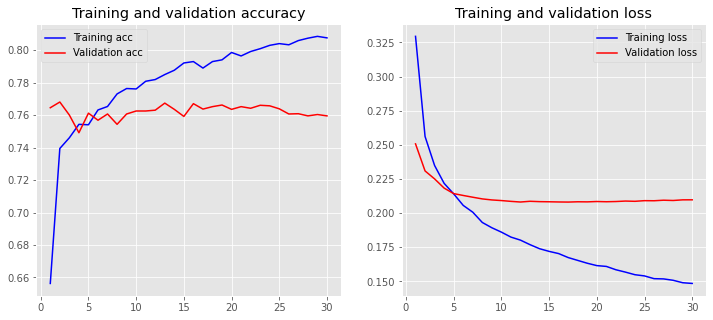

In [86]:
loss, accuracy = model.evaluate([train_X,train_X,train_X], y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate([valid_X,valid_X,valid_X],y_valid, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [62]:
from pickle import load
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


In [77]:
# channel 1
inputs1 = Input(shape=(maxlen,))
embedding1 = Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],trainable=False)(inputs1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPooling1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
# channel 2
inputs2 = Input(shape=(maxlen,))
embedding2 = Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],trainable=False)(inputs2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPooling1D(pool_size=2)(drop2)
flat2 = Flatten()(pool2)
# channel 3
inputs3 = Input(shape=(maxlen,))
embedding3 = Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],trainable=False)(inputs3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPooling1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)
# merge
merged = concatenate([flat1, flat2, flat3])
# interpretation
dense1 = Dense(400, activation='relu')(merged)
dense2=  Dense(100,activation='relu')(dense1)
outputs = Dense(6, activation='sigmoid')(dense2)
model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
# compile
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# summarize
print(model.summary())


Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 300, 300)     17907900    input_13[0][0]                   
_______________________________________________________________________________________

In [78]:
y_valid

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
15000,0,0,1,0,0,0
15001,1,1,0,0,0,0
15002,0,1,0,0,0,0
15003,0,1,0,0,0,0
15004,1,0,0,1,0,0
...,...,...,...,...,...,...
20967,1,1,0,0,0,0
20968,0,1,0,0,0,0
20969,1,0,0,0,0,0
20970,0,0,1,1,0,0


In [79]:
history=model.fit([train_X,train_X,train_X], y_train,validation_data=([valid_X,valid_X,valid_X], y_valid),verbose=True, epochs=30, batch_size=70)

Epoch 1/30
215/215 [==============================] - 6s 27ms/step - loss: 0.3055 - accuracy: 0.6755 - val_loss: 0.2497 - val_accuracy: 0.7567
Epoch 2/30
215/215 [==============================] - 5s 25ms/step - loss: 0.2321 - accuracy: 0.7380 - val_loss: 0.2402 - val_accuracy: 0.7180
Epoch 3/30
215/215 [==============================] - 5s 25ms/step - loss: 0.2140 - accuracy: 0.7425 - val_loss: 0.2195 - val_accuracy: 0.7605
Epoch 4/30
215/215 [==============================] - 5s 24ms/step - loss: 0.2018 - accuracy: 0.7519 - val_loss: 0.2165 - val_accuracy: 0.7435
Epoch 5/30
215/215 [==============================] - 5s 24ms/step - loss: 0.1910 - accuracy: 0.7584 - val_loss: 0.2115 - val_accuracy: 0.7567
Epoch 6/30
215/215 [==============================] - 5s 24ms/step - loss: 0.1829 - accuracy: 0.7621 - val_loss: 0.2114 - val_accuracy: 0.7359
Epoch 7/30
215/215 [==============================] - 5s 25ms/step - loss: 0.1763 - accuracy: 0.7697 - val_loss: 0.2109 - val_accuracy: 0.7389

In [65]:
X_train_text

0        predictive model allow subject specific infere...
1        rotation invariance translation invariance gre...
2        introduce develop notion spherical polyharmoni...
3        stochastic landau lifshitz gilbert llg equatio...
4        fourier transform infra red ftir spectrum samp...
                               ...                        
14995    challenge understanding high temperature super...
14996    work apply cole non standard form fdtd solve t...
14997    magnetic oxyselenides topic research several d...
14998    paper present novel framework integration visi...
14999    design uniaxial anisotropic metamaterial layer...
Name: ABSTRACT, Length: 15000, dtype: object

In [80]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


array([ 114, 1741, 5476, 2941, 3993, 5476,  464, 2954, 1069, 1380,  223,
         41,  163, 1357,  460,  163,  460,  742,  316, 5476,   28,  227,
       1184,  711, 3576,  181,   67,  157,  227,  237,   32, 1550,  335,
        742,  316,  705, 2555,    5,  223,  127,   16,  220,  742, 5872,
        866,  561, 2034,  593, 3469,  117,  350,   74,   16, 1980,    5,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Training Accuracy: 0.8749
Testing Accuracy:  0.7465


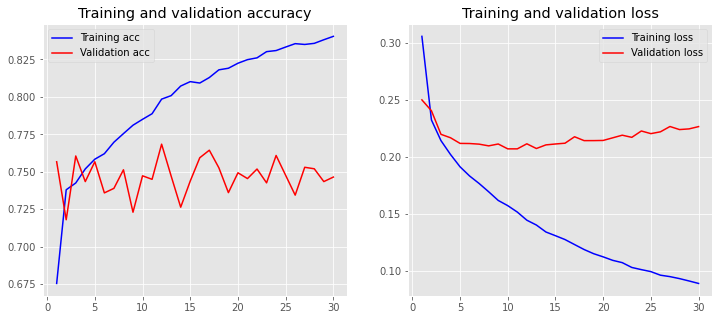

In [82]:
loss, accuracy = model.evaluate([train_X,train_X,train_X], y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate([valid_X,valid_X,valid_X],y_valid, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [87]:
predicted=model.predict(test_X)

In [88]:
predicted

array([[4.75364536e-01, 7.68623594e-03, 5.17718829e-02, 9.53384399e-01,
        2.54217498e-02, 9.78692528e-03],
       [2.32951809e-03, 9.99164939e-01, 4.23839455e-03, 1.03943632e-03,
        3.25136934e-03, 5.02064824e-04],
       [6.63137853e-01, 3.34973149e-02, 1.02838784e-01, 6.53155267e-01,
        4.97837216e-02, 3.29289585e-02],
       ...,
       [2.65430808e-01, 9.61411372e-02, 1.55703984e-02, 4.21172440e-01,
        6.92147195e-01, 1.60459355e-02],
       [2.41410136e-01, 2.30468111e-03, 2.07073152e-01, 9.80351985e-01,
        6.28307788e-03, 3.38168698e-03],
       [3.07579815e-01, 9.11942217e-03, 9.15926397e-01, 7.20534520e-03,
        4.98221139e-04, 2.94708158e-03]], dtype=float32)

In [89]:
for x,i in enumerate(predicted):
  for y,z in enumerate(i):
    if z>=0.50:
      predicted[x][y]=1
    else:
      predicted[x][y]=0

In [90]:
predicted

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [91]:
submit=pd.read_csv('/content/drive/My Drive/Topic-modeling/sample_submission_UVKGLZE.csv')

In [92]:
submit.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,0,0,0
1,20974,0,0,0,0,0,0
2,20975,0,0,0,0,0,0
3,20976,0,0,0,0,0,0
4,20977,0,0,0,0,0,0


In [93]:
submit.iloc[:,1:]=predicted

In [94]:
submit

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0.0,0.0,0.0,1.0,0.0,0.0
1,20974,0.0,1.0,0.0,0.0,0.0,0.0
2,20975,1.0,0.0,0.0,1.0,0.0,0.0
3,20976,0.0,1.0,0.0,0.0,0.0,0.0
4,20977,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8984,29957,1.0,0.0,0.0,0.0,0.0,0.0
8985,29958,0.0,0.0,1.0,0.0,0.0,0.0
8986,29959,0.0,0.0,0.0,0.0,1.0,0.0
8987,29960,0.0,0.0,0.0,1.0,0.0,0.0


In [95]:
submit.to_csv('submit5.csv',index=False)